### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# from FastICA import *
import soundfile as sf
import pyroomacoustics as pra

from IPython.display import Audio
from IPython.display import display

from scipy import signal

from sklearn import decomposition

import matplotlib.style as style
plt.rcParams["figure.figsize"] = (16, 9)
style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 2. Delayed Mixture

#### 2.1 Microphones/Sources Organization

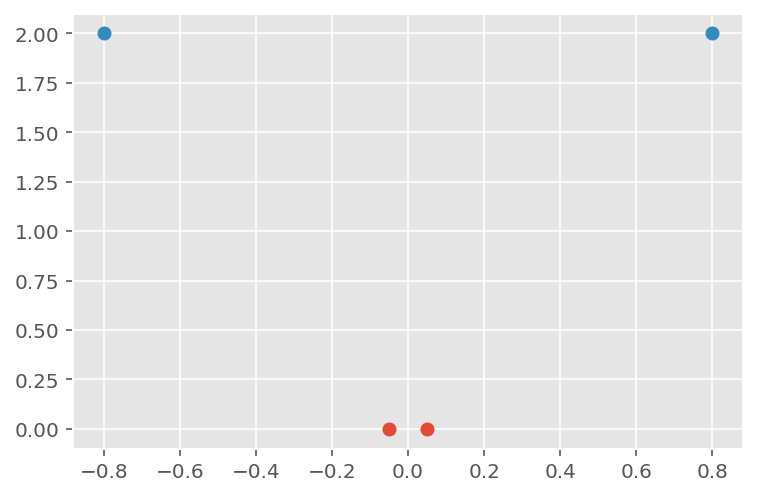

0.037130444880690394
0.1


In [35]:
micA, micB = np.array([-0.05, 0]), np.array([0.05, 0])
microphones = [micA, micB]
sourceD, sourceE = np.array([-0.8, 2]), np.array([0.8, 2])
sources = [sourceD, sourceE]

plt.plot([mic[0] for mic in microphones], [mic[1] for mic in microphones], 'o')
plt.plot([source[0] for source in sources], [source[1] for source in sources], 'o')
plt.show()

dist = lambda x, y: np.sqrt(np.sum(np.square(x - y)))
BE = dist(sourceE, micB)
BA = dist(sourceE, micA)
relativeDistance = BA - BE
print(relativeDistance)

#### 2.2 Separation

In [37]:
S0, fs = sf.read("count.wav")
S1, fs = sf.read("colors.wav")

# resample to 8kHz
S0 = signal.resample(S0, int(len(S0) * 8000/fs))
S1 = signal.resample(S1, int(len(S1) * 8000/fs))
fs = 8000

S0 = S0.ravel()
S1 = S1.ravel()

S = np.vstack((S0, S1))
assert(S.shape == ((2, len(S1))))

np.random.seed(42)

# first mixture is the reference, so no delay is necessary 
X0 = np.random.rand(1, 2).dot(S)

# delay audios
speedOfSound = 343
delayInSamples = int(relativeDistance / speedOfSound * fs)
assert(delayInSamples == 0)

# as the delay is null, no delay is necessary

X1 = np.random.rand(1, 2).dot(S)

X = np.vstack((X0, X1))

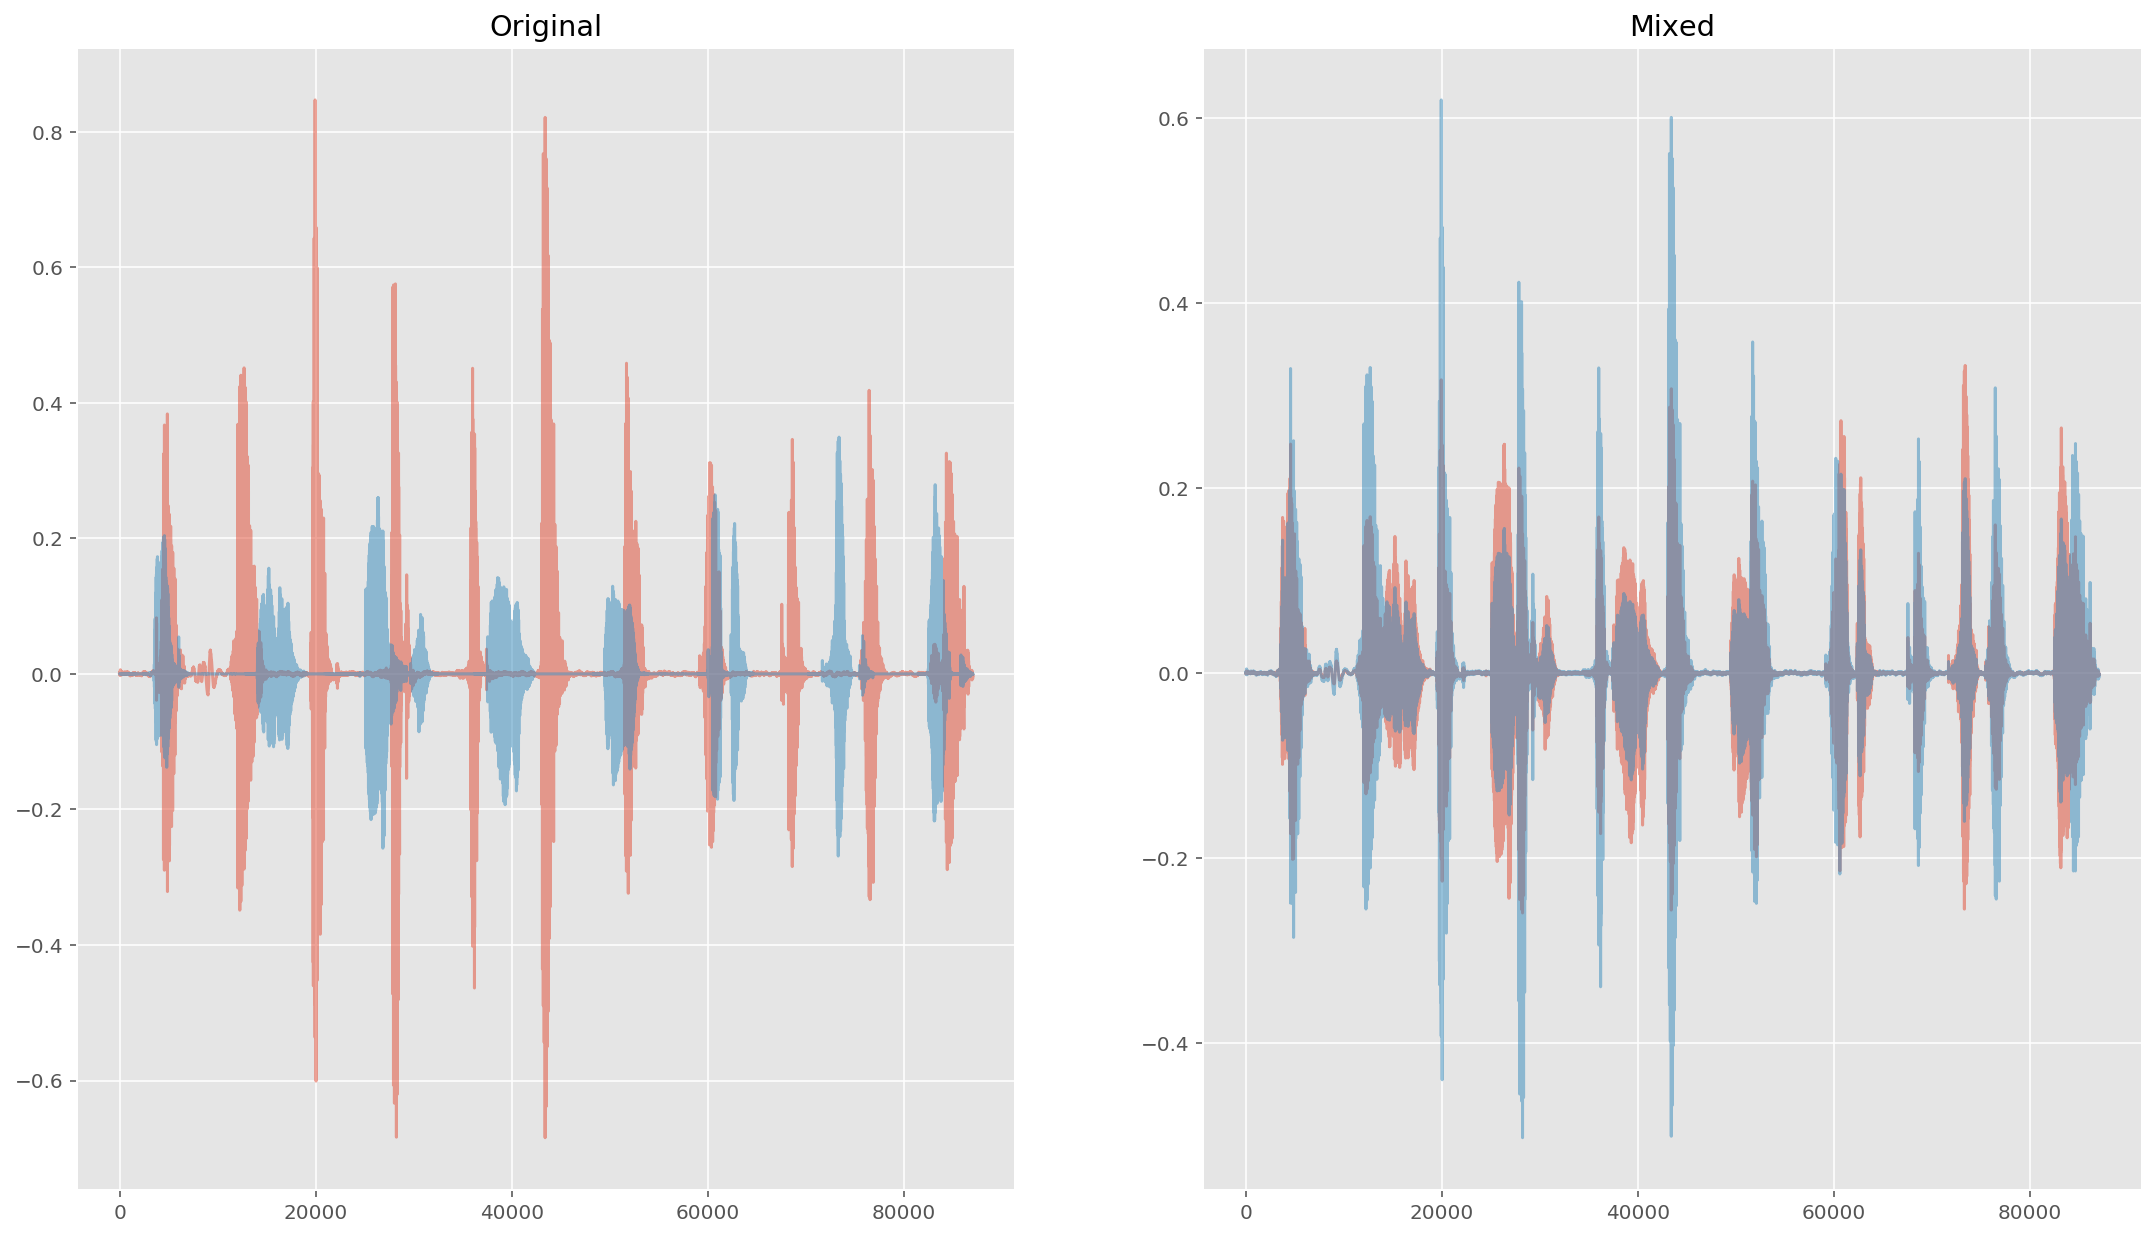

In [28]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Original")
ax1.plot(S.T, alpha=0.5)

ax2.set_title("Mixed")
ax2.plot(X.T, alpha=0.5)

fig.set_size_inches(18.5, 10.5)
plt.show()

In [29]:
for i in range(len(S)):
    print(f"Original Audio {i+1}")
    display(Audio(S[i], rate=fs))

for i in range(len(X)):
    print(f"Mixed Audio {i+1}")
    display(Audio(X[i], rate=fs))

Original Audio 1


Original Audio 2


Mixed Audio 1


Mixed Audio 2


In [30]:
# try to separate with ICA
ica = decomposition.FastICA()
Y = ica.fit_transform(X.T).T

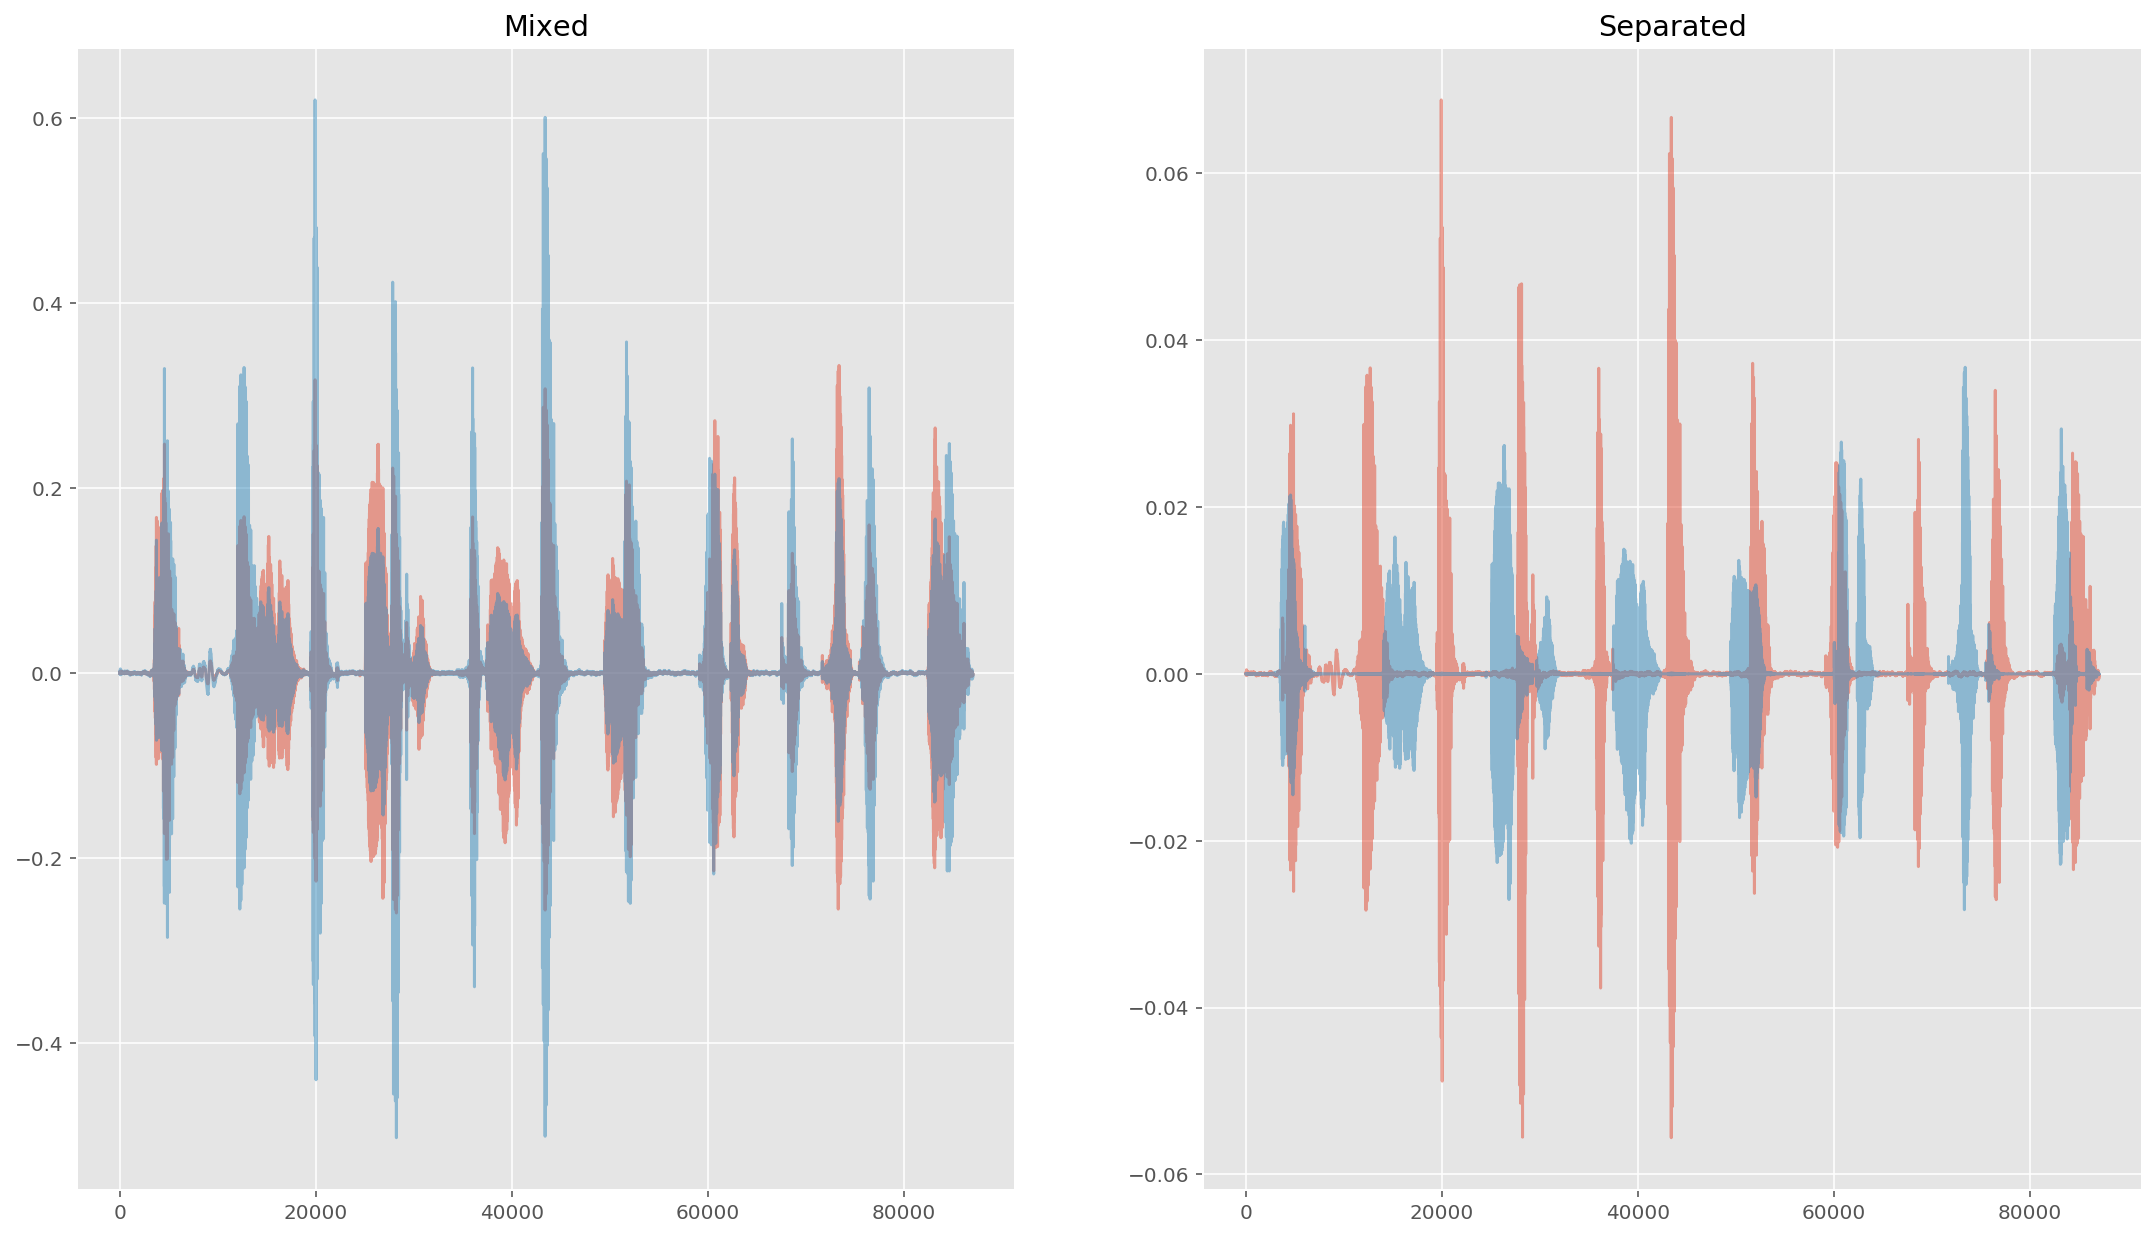

In [31]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Mixed")
ax1.plot(X.T, alpha=0.5)

ax2.set_title("Separated")
ax2.plot(Y.T, alpha=0.5)

fig.set_size_inches(18.5, 10.5)
plt.show()

In [32]:
for i in range(len(S)):
    print(f"Unmixed Audio {i+1}")
    display(Audio(Y[i], rate=fs))

Unmixed Audio 1


Unmixed Audio 2
